In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
df=pd.read_csv(r'C:\Users\aakan\OneDrive\Desktop\AIDTM\PFM\TREASURYDATA.csv')

In [22]:
df

,Date,Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,29-11-1993,5.075,3.110,5.732,6.226
1,30-11-1993,5.146,3.140,5.795,6.286
2,01-12-1993,5.132,3.110,5.783,6.268
3,02-12-1993,5.146,3.110,5.778,6.263
4,03-12-1993,5.175,3.110,5.783,6.258
...,...,...,...,...,...
130,31-05-1994,6.765,4.170,7.152,7.435
131,01-06-1994,6.735,4.180,7.107,7.382
132,02-06-1994,6.675,4.130,7.059,7.350
133,03-06-1994,6.578,4.110,6.963,7.257


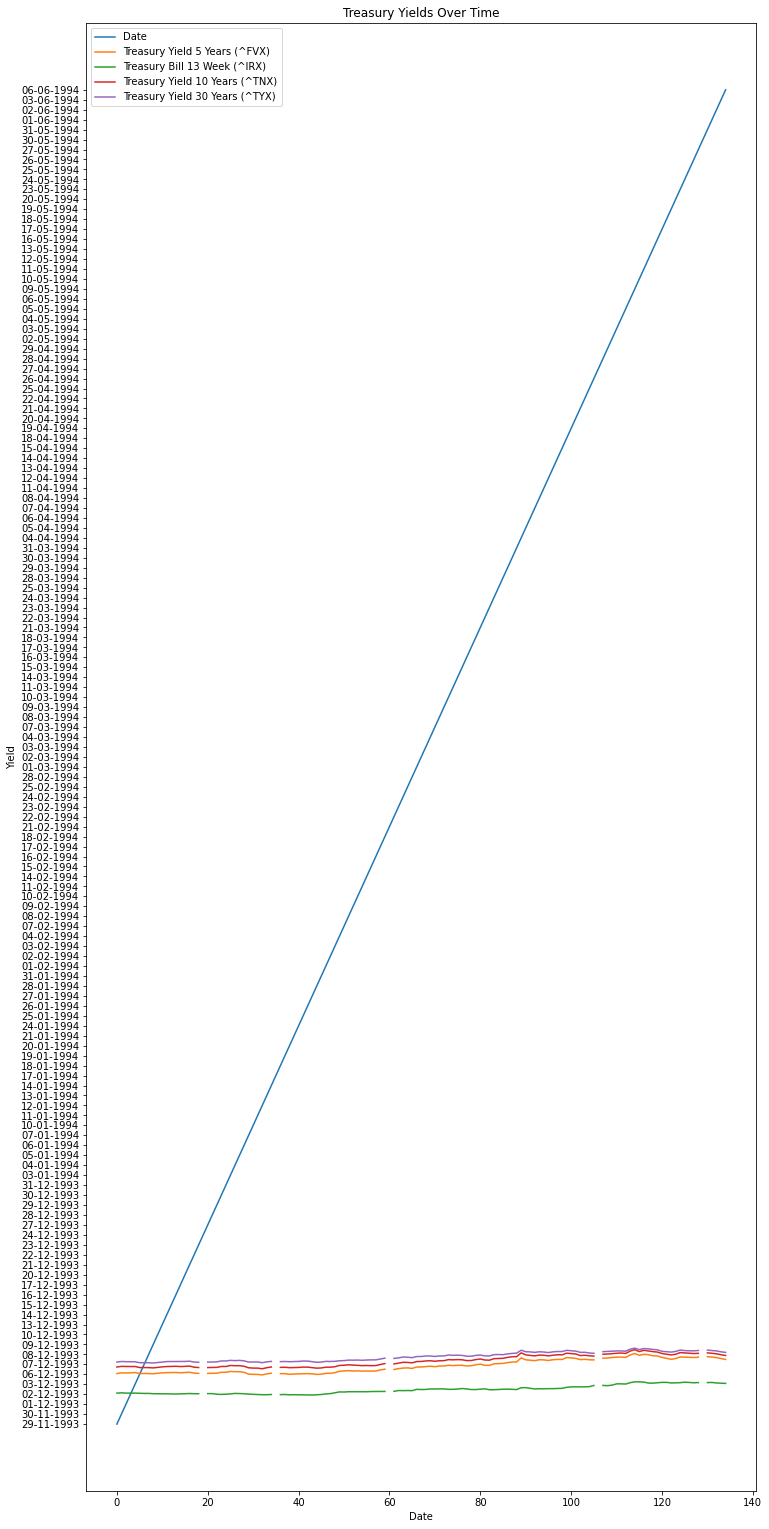

Correlation Matrix:
                                Treasury Yield 5 Years (^FVX)  \
Treasury Yield 5 Years (^FVX)                        1.000000   
Treasury Bill 13 Week (^IRX)                         0.955394   
Treasury Yield 10 Years (^TNX)                       0.998982   
Treasury Yield 30 Years (^TYX)                       0.994660   

                                Treasury Bill 13 Week (^IRX)  \
Treasury Yield 5 Years (^FVX)                       0.955394   
Treasury Bill 13 Week (^IRX)                        1.000000   
Treasury Yield 10 Years (^TNX)                      0.948907   
Treasury Yield 30 Years (^TYX)                      0.940141   

                                Treasury Yield 10 Years (^TNX)  \
Treasury Yield 5 Years (^FVX)                         0.998982   
Treasury Bill 13 Week (^IRX)                          0.948907   
Treasury Yield 10 Years (^TNX)                        1.000000   
Treasury Yield 30 Years (^TYX)                        0.996637   

  

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 27))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Treasury Yields Over Time')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.show()

correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


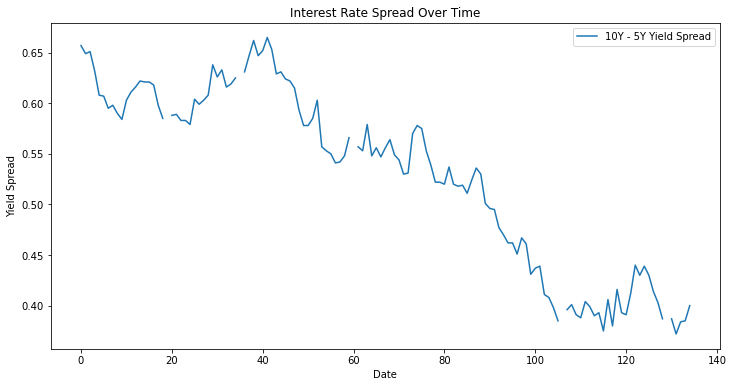

In [40]:
df['Yield Spread 10Y 5Y'] = df['Treasury Yield 10 Years (^TNX)'] - df['Treasury Yield 5 Years (^FVX)']

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Yield Spread 10Y 5Y'], label='10Y - 5Y Yield Spread')
plt.title('Interest Rate Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Yield Spread')
plt.legend()
plt.show()

In [39]:
correlation_matrix = df.corr()
print("Correlation Matrix with Stock Data:")
print(correlation_matrix)


Correlation Matrix with Stock Data:
                                Treasury Yield 5 Years (^FVX)  \
Treasury Yield 5 Years (^FVX)                        1.000000   
Treasury Bill 13 Week (^IRX)                         0.955394   
Treasury Yield 10 Years (^TNX)                       0.998982   
Treasury Yield 30 Years (^TYX)                       0.994660   
Yield Spread 10Y 5Y                                 -0.953397   
Yield_Curve_Slope                                   -0.953397   

                                Treasury Bill 13 Week (^IRX)  \
Treasury Yield 5 Years (^FVX)                       0.955394   
Treasury Bill 13 Week (^IRX)                        1.000000   
Treasury Yield 10 Years (^TNX)                      0.948907   
Treasury Yield 30 Years (^TYX)                      0.940141   
Yield Spread 10Y 5Y                                -0.947752   
Yield_Curve_Slope                                  -0.947752   

                                Treasury Yield 10 Years (^T

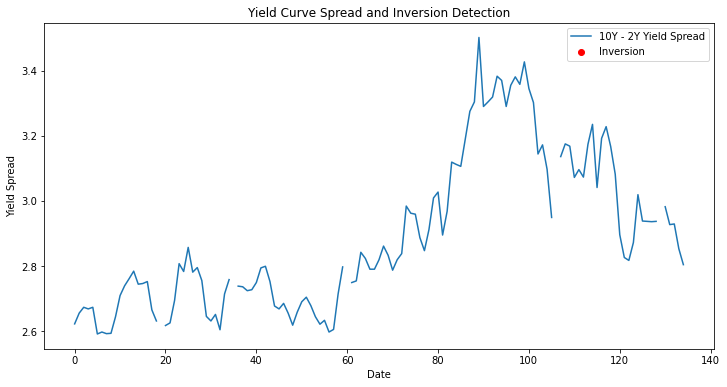

In [41]:

df['Yield Spread 10Y 2Y'] = df['Treasury Yield 10 Years (^TNX)'] - df['Treasury Bill 13 Week (^IRX)']

inversion_dates = df[df['Yield Spread 10Y 2Y'] < 0].index

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Yield Spread 10Y 2Y'], label='10Y - 2Y Yield Spread')
plt.scatter(inversion_dates, df.loc[inversion_dates, 'Yield Spread 10Y 2Y'], color='red', label='Inversion')
plt.title('Yield Curve Spread and Inversion Detection')
plt.xlabel('Date')
plt.ylabel('Yield Spread')
plt.legend()
plt.show()
